<a href="https://colab.research.google.com/github/sudeep-009/GooglePlayStoreApp-analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**Introduction**
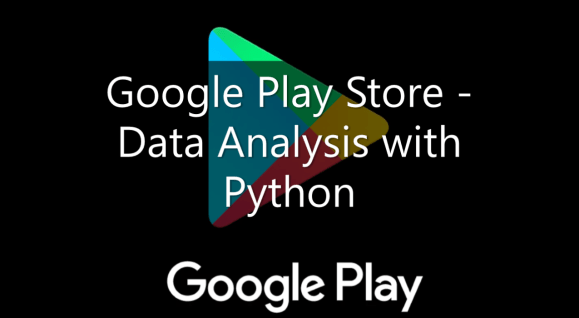






There is famous phrase which tell us that ***Data is the new oil of 21st century.***Business growth involves garnering as many customers as you can. This requires knowing exactly what customers desire and what channels they use to find products and services.In today cut-throat competation taking business decision based on gut-feel could have negative impact. Therefore utilizing the potential of value store beneath the mountain of data would be very effective.     
     In the PlayStore App data analysis we generally tried to find some of the actionalble insight that would help our app developers to develop an app that would have huge customer base based on their previous experience. Digging out the value from data which would help the app making business to grow at huge volume is the main objective of this data analysis
   

#**Exploratory Data Analysis**
Before starting we should first understand what actually Exploratory Data Analysis is ?
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.
As we have understand what EDA actually is lets start our fun journey of playing around with the dataset.

#**Lets Start Our Journey!!!**

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.style.use('ggplot') #to have ggplot like style
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First we will import our datasets and convert it into pandas DataFrame.We have been given two datasets one for the PlayStore App and another for the user review. Lets go through it one by one. First we will explore the app dataset and then we will go through the userview dataset.

In [7]:
working_directory = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/EDA-Capstone-Play Store App Review'
app_df = pd.read_csv(working_directory+'/Play Store Data.csv')
user_review_df = pd.read_csv(working_directory+'/User Reviews.csv')

##**First we will go through our App Dataset**

Let see the first five record of our dataset so as to have some basic idea of what actually we have.

In [8]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Let See how many records we have in our app dataset and the number of features for each record**

In [9]:
print(f'No. of records present in our dataset: {app_df.shape[0]}')
print(f'No. of features each record have is: {app_df.shape[1]}')

No. of records present in our dataset: 10841
No. of features each record have is: 13


**Lets go through the each of the features present in our app dataset**

In [10]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Features present in our App dataset are as follows:

*   **App**: Name of the App.
*   **App Category**: Category of the app. Like Games, Fitness etc

*   **Rating**: Rating of the app out of in scale of 1 to 5.

*   **Reviews**: Number of reviews each app received.

*   **Size**: The memory size needed to install the application.

*   **Installs**: No. of install of particular app

*   **Type**: Whether the app is free or a paid app.

*   **Price**: The price of the app.

*   **Content Rating**: This feature tell us about the intended audience for the app like teens, everyone etc
.

*   **Genres**: The sub-category for each app. 

*   **Last Updated**: date of the most recent update for the app.

*   **Current Ver**: The app's current version.

*   **Android Ver**: The oldest version of Android OS supported by the app.




In [11]:
def PS_info():
  info = pd.DataFrame(index=app_df.columns)
  info['dtype'] = app_df.dtypes
  info['Unique'] = app_df.nunique()
  info['Num_ofNullValues'] = app_df.isnull().sum()
  info['Num_nonNullValues'] = app_df.count()
  info['percent_ofNullValues'] = info['Num_ofNullValues']/len(app_df) * 100
  return info

PS_info()

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
App,object,9660,0,10841,0.000000
Category,object,34,0,10841,0.000000
Rating,float64,40,1474,9367,13.596532
Reviews,object,6002,0,10841,0.000000
Size,object,462,0,10841,0.000000
Installs,object,22,0,10841,0.000000
Type,object,3,1,10840,0.009224
Price,object,93,0,10841,0.000000
Content Rating,object,6,1,10840,0.009224
Genres,object,120,0,10841,0.000000


# **Lets go through the User Review dataset!!!**

In [12]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


**Let see how many records are present in our dataset and also the number of features each record have**

In [13]:
print(f'No of Records present in user review dataset are {user_review_df.shape[0]}')
print(f'No of features each record have is {user_review_df.shape[1]}')

No of Records present in user review dataset are 64295
No of features each record have is 5


**Lets go through each of the features and see what it tell us**

In [14]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


So Basically we have five features in this dataset which are as follows:




*   App - It tells us about the name of the application.
*   Translated_Review - It tells us about what the users feedback is about the application.
*   Sentiment - It tells us about a view or opinion of the user w.r.t. the application.
*   Sentiment_Polarity - Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the application.
*   Sentiment_Subjectivity - It refers to the text that contains text which is usually expressed by a human having typical moods, emotions, and feelings. Mostly it is a public opinion and not a factual information.





In [15]:
def UR_info():
  info = pd.DataFrame(index=user_review_df.columns)
  info['dtype'] = user_review_df.dtypes
  info['Unique'] = user_review_df.nunique()
  info['Num_ofNullValues'] = user_review_df.isnull().sum()
  info['Num_nonNullValues'] = user_review_df.count()
  info['percent_ofNullValues'] = info['Num_ofNullValues']/len(user_review_df) * 100
  return info
UR_info()

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
App,object,1074,0,64295,0.000000
Translated_Review,object,27994,26868,37427,41.788631
Sentiment,object,3,26863,37432,41.780854
Sentiment_Polarity,float64,6195,26863,37432,41.780854
Sentiment_Subjectivity,float64,4530,26863,37432,41.780854


# **Now its time to start doing some cleaning operation!!!**
We will start with handling the **missing values** present in our app dataset

In [16]:
app_df_na = app_df.isnull().sum()/len(app_df)*100
app_df_na = app_df_na.drop(app_df_na[app_df_na == 0].index,axis=0).reset_index()
app_df_na.columns = ['Feature Name','Missing Ratio']
app_df_na

,Feature Name,Missing Ratio
0,Rating,13.596532
1,Type,0.009224
2,Content Rating,0.009224
3,Current Ver,0.073794
4,Android Ver,0.027673


I will **drop all the null values present the Rating column** because filling almost 14% of data with some alternative value could lead us to a wrong analysis and i think rating is very important feature present in this dataset so i will not going to manipulate it.

In [17]:
app_df.dropna(subset=['Rating'],inplace=True)

In [18]:
app_df_na = app_df.isnull().sum()/len(app_df)*100
app_df_na = app_df_na.drop(app_df_na[app_df_na == 0].index,axis=0).reset_index()
app_df_na.columns = ['Feature Name','Missing Ratio']
app_df_na

,Feature Name,Missing Ratio
0,Content Rating,0.010676
1,Current Ver,0.042703
2,Android Ver,0.032027


Ratio of Missing value for all other feature is almost negligible so just **fill them with their mode**

In [19]:
app_df['Current Ver'] = app_df['Current Ver'].fillna(app_df['Current Ver'].mode()[0])
app_df['Android Ver'] = app_df['Android Ver'].fillna(app_df['Android Ver'].mode()[0])
app_df['Content Rating'] = app_df['Content Rating'].fillna(app_df['Content Rating'].mode()[0])


###**Duplicate Values**
Now Let See how many duplicate value are present are in the App Column and drop those records as these are added more than one time by mistake. Means its just like having two or more record for the same app. So lets just delete them


In [20]:
duplicate_app = len(app_df)-len(pd.unique(app_df['App']))
print(f'Number of duplicate value present in the app column is {duplicate_app}')

Number of duplicate value present in the app column is 1170


In [21]:
app_df = app_df.drop_duplicates(subset=['App'])

Now let see how many records are present in the dataset after removing the duplicates and dropping the null values


In [22]:
print(f'No. of records present in our dataset is: {app_df.shape[0]}')

No. of records present in our dataset is: 8197


In [23]:
PS_info()

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
App,object,8197,0,8197,0.0
Category,object,34,0,8197,0.0
Rating,float64,40,0,8197,0.0
Reviews,object,5322,0,8197,0.0
Size,object,415,0,8197,0.0
Installs,object,20,0,8197,0.0
Type,object,3,0,8197,0.0
Price,object,74,0,8197,0.0
Content Rating,object,6,0,8197,0.0
Genres,object,115,0,8197,0.0


####**Lets check the sanity of Rating Column**
As dtype of Rating is int type we can perform some sort of visulization to see if there is any noticable outlier present

Text(0, 0.5, 'Rating')

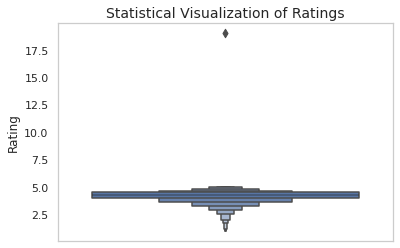

In [24]:
%matplotlib inline
sns.set_theme(style="whitegrid")
sns.boxenplot(y=app_df['Rating'])
plt.grid(False)
plt.title('Statistical Visualization of Ratings',size=14)
plt.ylabel('Rating',size=12)

**Findings:**

1.   One outlier is present with value of value of around 19 which need to be remove as Rating can take value between 1 to 5 inclusive.
2.   We can also see that the median of Rating is around 4.5 which tell us that most of the apps are rated fairly well.



In [25]:
# REMOVING OUTLIER PRESENT IN RATING COLUMN AND THEN GETTING IDEA OF THE RECORDS PRESENT IN CURRENT DATASET
app_df.drop(index=app_df[app_df['Rating']==app_df['Rating'].max()].index,axis=0,inplace=True)
app_df.shape

(8196, 13)

##**Transforming Features!!**

####**Reviews:**For Reviews we will simply convert it into int datatype without any cleaning process

In [26]:
app_df['Reviews'] = app_df['Reviews'].apply(lambda x: int(x))

####**Installs:**

In [35]:
#Change type of Installs as int type
app_df.groupby('Installs').agg({"App": "count"}).reset_index()['Installs']

0                 1+
1             1,000+
2         1,000,000+
3     1,000,000,000+
4                10+
5            10,000+
6        10,000,000+
7               100+
8           100,000+
9       100,000,000+
10                5+
11            5,000+
12        5,000,000+
13               50+
14           50,000+
15       50,000,000+
16              500+
17          500,000+
18      500,000,000+
Name: Installs, dtype: object

**Operations need to be performed:**

1.   Removing plus(+) sign
2.   Removing comma(,) sign
3.   Converting data type into int



In [38]:
#So first we have to replace the + and , sign from the column and then convert it into int
app_df['Installs'] = app_df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
app_df['Installs'] = app_df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)
app_df['Installs'] = app_df['Installs'].apply(lambda x: int(x))




####**Price:**

In [36]:

app_df[app_df['Price'] != '0']['Price']

234       $4.99
235       $4.99
427       $3.99
476       $3.99
477       $6.99
          ...  
10690     $0.99
10697     $0.99
10760     $7.99
10782    $16.99
10785     $1.20
Name: Price, Length: 604, dtype: object

**Operations:**


1.   Remove $(dollar) sign.
2.   Convert type into float.



In [37]:
app_df['Price'] = app_df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
app_df['Price'] = app_df['Price'].apply(lambda x: float(x))



####**Size:** 

**Operations:**


1.   Replacing String 'Varies with Device' with Nan
2.   Removing comman(,)
3.   Replacing 'M'
4.   Bringing consistency in unit by converting kilobyte into megabyte and replacing 'k
5.   Finally converting datatype into float



In [39]:
app_df['Size'] = app_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
app_df['Size'] = app_df['Size'].apply(lambda x: str(x).replace(',','') if 'M' in str(x) else x)
app_df['Size'] = app_df['Size'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)
app_df['Size'] = app_df['Size'].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)
# app_df['Size'] = app_df['Size'].apply(lambda x: str(x).replace('k','') if 'k' in str(x) else x)
app_df['Size'] = app_df['Size'].apply(lambda x: float(x))


####**Last Updated:**
We will convert the data type of this feature into pandas datetime.

In [40]:
app_df['Last Updated'] = app_df['Last Updated'].apply(lambda x: pd.to_datetime(x))

####**Genres:**
We will transformed  the genres into list so that individual sub category could be identified.

In [41]:
app_df['Genres'] = app_df['Genres'].apply(lambda x: x.split(";") if type(x) == str else x)



###**Finally we completed our cleaning and transforming task**
Let us see how our dataset now look like

In [42]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8196 non-null   object        
 1   Category        8196 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         8196 non-null   int64         
 4   Size            7027 non-null   float64       
 5   Installs        8196 non-null   int64         
 6   Type            8196 non-null   object        
 7   Price           8196 non-null   float64       
 8   Content Rating  8196 non-null   object        
 9   Genres          8196 non-null   object        
 10  Last Updated    8196 non-null   datetime64[ns]
 11  Current Ver     8196 non-null   object        
 12  Android Ver     8196 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 896.4+ KB


###**Takeaways:**


1.   We now have 8196 records in our app dataset.
2.   No null values are present in our app dataset.
3.   Successfully removed the ignorable outliers present in our dataset.
4.   Removed the duplicate items present in our dataset.
5.   Transformed the Installs, Reviews, Price and Size column in our dataset into int or float data type so as to perform bivariate or multivariate analysis over these feature space.
6.   Finally we have also transformed the Last Updated column into pandas datatime so that if possible then we can also find out some actionable insights on the basis of this feature.
7.   Transformed the Genres into list.



##**Cleaning user review dataset!!!**

In [43]:
UR_info()

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
App,object,1074,0,64295,0.000000
Translated_Review,object,27994,26868,37427,41.788631
Sentiment,object,3,26863,37432,41.780854
Sentiment_Polarity,float64,6195,26863,37432,41.780854
Sentiment_Subjectivity,float64,4530,26863,37432,41.780854


As there are lots of null values present in this datasets...so its may be because those apps have not received any user review.Let make a copy of this dataset and drop the null values.


In [44]:
new_ur_df = user_review_df.copy()
new_ur_df.dropna(inplace=True)
new_ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


Further no cleaning is required is in this dataset.

#**Data Exploration!!!**
We will start with pairplot catering all the numerical feature space present in the dataset.

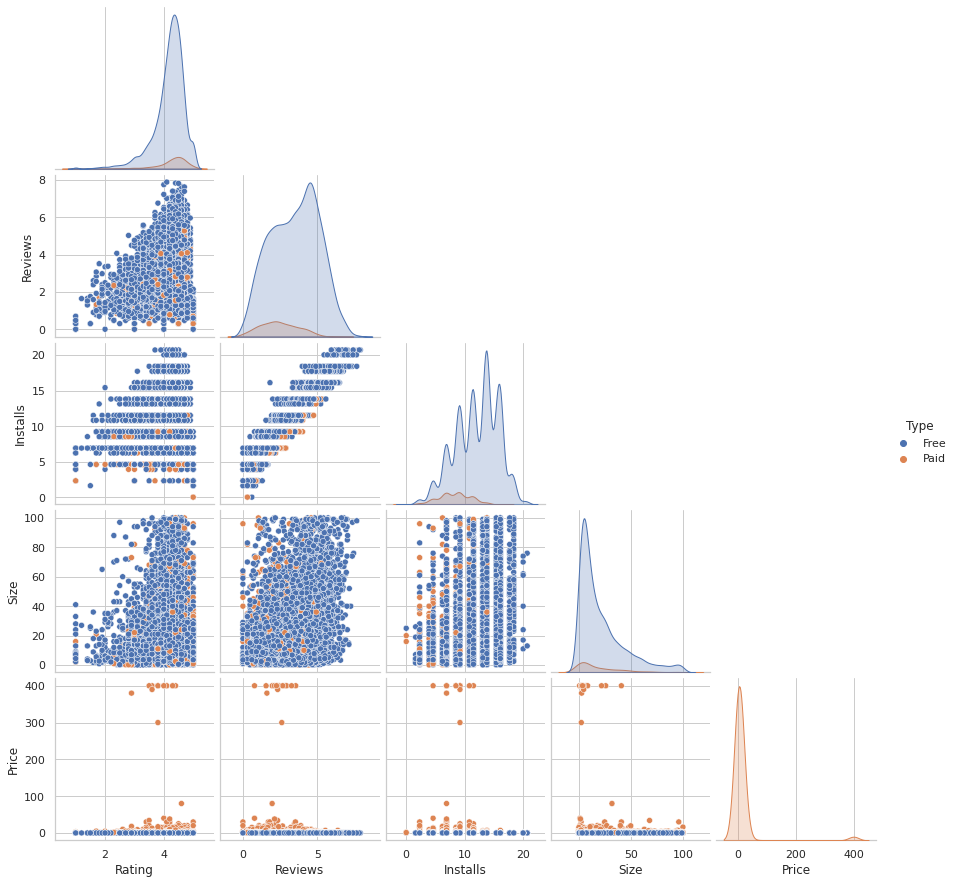

In [45]:
Rating = app_df['Rating']
Reviews = np.log10(app_df['Reviews'])
Installs = np.log(app_df['Installs'])
Size = app_df['Size']
Price = app_df['Price']
Type = app_df['Type']
sns.pairplot(data=pd.DataFrame(zip(Rating,Reviews,Installs,Size,Price,Type),columns=['Rating','Reviews','Installs','Size','Price','Type']),hue='Type',corner=True)

**Findings**


*   Most of the App are Free

*   Most of the Paid Apps have Rating around 4

*   As the number of installation increases the number of reviews of the particaular app also increases.
*   Most of the Apps are light-weighted.



##**Let us see what insight we can have on the basis of Size of an app**

**Size vs Rating**

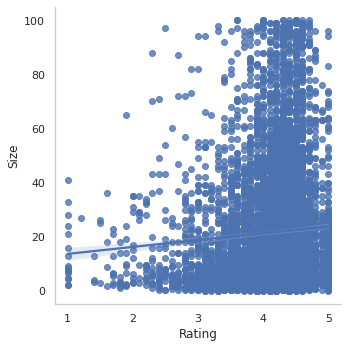

In [46]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(x='Rating',y='Size',data=app_df)



**Size vs Install**

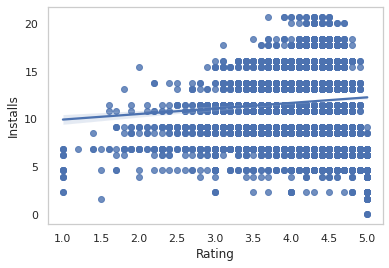

In [47]:
sns.set_style("whitegrid", {'axes.grid' : False})
Installs = np.log(app_df['Installs'])
sns.regplot(x=app_df['Rating'],y=Installs)

**1)Which categories have bulkiest app and how they are rated?**

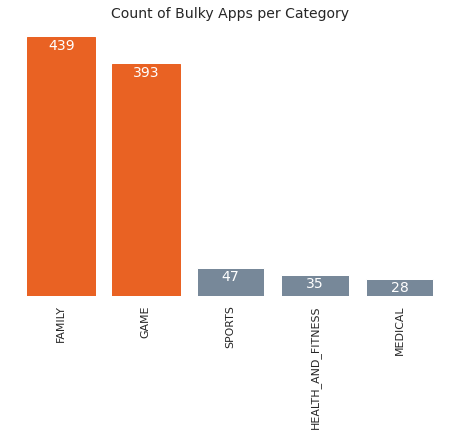

In [181]:
# First we need to trim our dataset for apps having size > 40 MB
bulky_app_df = app_df[app_df['Size']>40]
bulky_app_categories_df = bulky_app_df.groupby('Category').agg({'Size':'count'}).reset_index().sort_values('Size',ascending=False).head()
plt.figure(figsize=(8,5))
ax = plt.axes()
ax.set_facecolor('white')
plt.xticks(rotation="90")
plt.grid(False)
plt.title('Count of Bulky Apps per Category',size = 14)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
for spine in plt.gca().spines.values():
  spine.set_visible(False)
bars = plt.bar(x=bulky_app_categories_df['Category'],height=bulky_app_categories_df['Size'],color='lightslategrey')
bars[0].set_color('#E96223')
bars[1].set_color('#E96223')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 22, str(int(bar.get_height())), 
                 ha='center', color='w', fontsize=14)


**Findings:**Bulky Apps mostly belongs to either of the two category:

1.   Family
2.   Game



**2)How these bulky apps have been rated by the users?**

Text(0, 0.5, '')

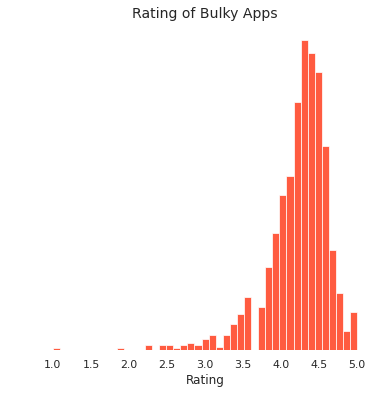

In [179]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (6,6)},style='whitegrid')
sns.histplot(data=bulky_app_df,x='Rating')
plt.title('Rating of Bulky Apps',size = 14)
plt.ylabel('Count of Rating', size=12)
plt.xlabel('Rating',size=12)
plt.grid(False)
plt.yticks(color='w')
for spine in plt.gca().spines.values():
  spine.set_visible(False)
plt.ylabel('')


**Finding:** Despite being bulky these apps are quite popular among the users.

##**Now let us See What information we can have from Paid App Category**
**First lets have some statistical idea about the price distribution of Paid App**

**1) What is the distribution of Paid apps and Free apps?**

In [178]:
paid_free_app_df = app_df.groupby('Type').agg({"App": "count"}).reset_index()
# sns.set_theme(style='whitegrid',palette='muted',rc={'figure.figsize': (10,10)})
# data = paid_free_app_df['App']
# labels = paid_free_app_df['Type']

# #define Seaborn color palette to use
# colors = sns.color_palette('pastel')[0:2]

# #create pie chart
# plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
# plt.title('Distribution of Paid and Free apps',size=15,loc='center')
# plt.show()
# sentiment_proportion = merge_df.groupby('Sentiment').agg({"Sentiment_Polarity": "count"}).reset_index()
# sentiment_proportion.columns = ['Sentiment','Count']
import plotly.express as px

fig = px.pie(paid_free_app_df, values='App', names='Type',title='Distribution of Paid Apps and Free Apps',labels={'Sentiment': 'Sentiment'})
fig.update_traces(textposition='inside', textinfo='percent+label',textfont_size=20, marker=dict( line=dict(color='#111111', width=1)))

fig.show(renderer='colab')

**Findings:**About 93% of the Apps are Free.

**1) What is the Average Price of the Paid Apps?**

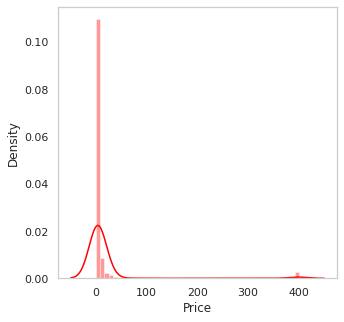

In [56]:
paid_apps = app_df[app_df.Type == 'Paid']
sns.set_theme(style="whitegrid",palette='muted',rc={'figure.figsize': (5,5)})
# sns.boxplot(y=paid_apps['Price'])
# plt.grid(False)
# plt.title('Statistical Visualization of Price for Paid Apps',size=14)
# plt.ylabel('Rating',size=12)
paid_apps = paid_apps['Price'].dropna()
sns.set_theme(style="whitegrid",palette='muted',rc={'figure.figsize': (5,5)})
ax = sns.distplot(paid_apps,color='red')
plt.grid(False)



In [131]:
paid_apps = app_df[app_df.Type == 'Paid']
print('Average Price of the Paid Apps is {}'.format(paid_apps['Price'].median()))

Average Price of the Paid Apps is 2.99


**Findings:**Price of most of the Paid Apps are generally less than 3 dollar

**2)Which are the Top 10 most expensive Apps available in playstore?**

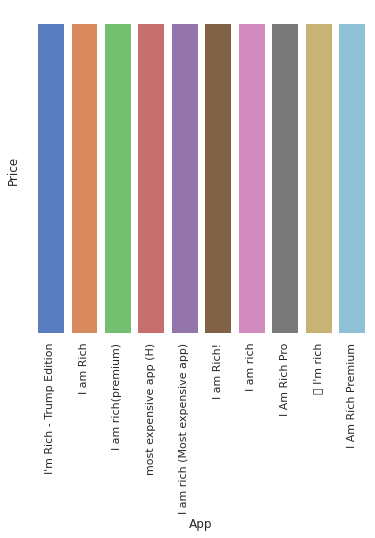

In [67]:
paid_apps = app_df[app_df.Type=='Paid']
top_expensive_apps = paid_apps.sort_values('Price',ascending=False).head(10)
sns.set_theme(style='whitegrid',rc={'figure.figsize': (6,6)},palette='muted')
sns.barplot(y=top_expensive_apps['Price'],x=top_expensive_apps['App'])
plt.xticks(rotation=90)
plt.grid(False)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
for spine in plt.gca().spines.values():
  spine.set_visible(False)
# top_expensive_apps['Price']

**2)What are genres of the highest paid Apps means apps which cost more than 100$ and let also see the number of installs they have and how they are rated?**

In [61]:
highest_paid_apps_genres = []
for index,row in paid_apps[paid_apps['Price']>100].iterrows():
  for item in row.Genres:
    highest_paid_apps_genres.append(item)
highest_paid_apps_genres = set(highest_paid_apps_genres)
highest_paid_apps_genres


{'Entertainment', 'Finance', 'Lifestyle'}

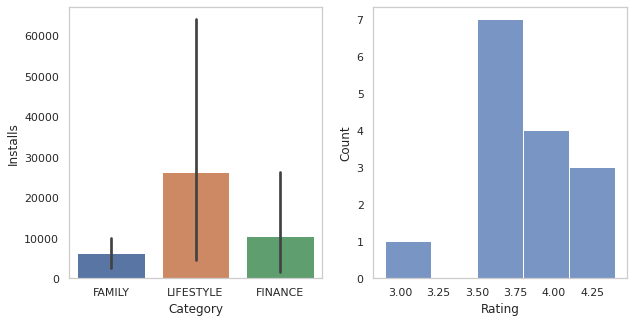

In [175]:
highest_paid_apps = paid_apps[paid_apps['Price']>100]
sns.set_theme(style='whitegrid')
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.barplot(ax=axes[0],y=highest_paid_apps['Installs'],x=highest_paid_apps['Category'])
axes[0].grid(False)
sns.histplot(ax=axes[1],x=highest_paid_apps['Rating'])
axes[1].grid(False)



**Findings:** As these apps have average number of Installation and most of them have been rated more than 3.5.So we can say that users could pay high amount for an app if it is developed in the category of Lifestyle or Finance.

#####**3)What role do the size of an app plays if the app is paid one?**

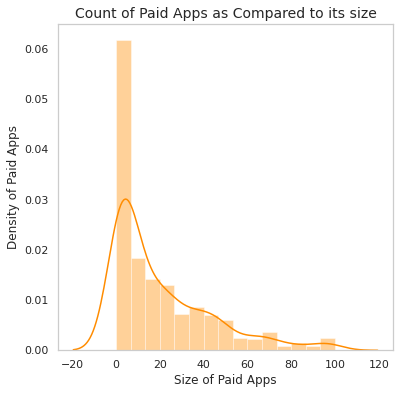

In [120]:
paid_apps = app_df[app_df.Type == 'Paid']
sns.set_theme(palette='autumn',rc={'figure.figsize': (6,6)},style='whitegrid')
sns.distplot(x=paid_apps['Size'],color='darkorange')
plt.title('Count of Paid Apps as Compared to its size',size=14)
plt.ylabel('Density of Paid Apps',size=12)
plt.xlabel('Size of Paid Apps',size=12)
plt.grid(False)

**Finding:**Most of the paid app apps are purposely made lighter by weight so as to garner specific user community. User prefer to buy apps that are lighter by weight. Developing bulky paid app probably will not perform well in the market.

**4)Which categories have most number of Paid Apps?**

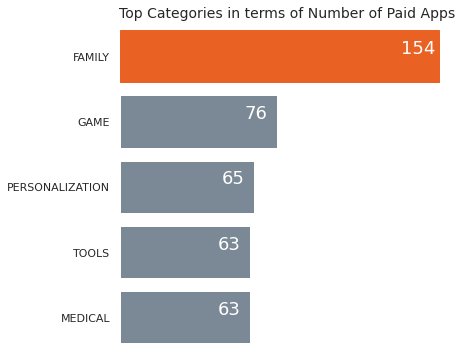

In [174]:
paid_apps_top_category = paid_apps.groupby('Category').agg({'App': 'count'}).reset_index().sort_values('App',ascending=False).head(5)
sns.set_theme(palette='pastel',rc={'figure.figsize': (6,6)},style='whitegrid')
plots = sns.barplot(x=paid_apps_top_category['App'],y=paid_apps_top_category['Category'],color='lightslategray')
plots.patches[0].set_color('#E96223')
plt.title('Top Categories in terms of Number of Paid Apps',size=14)
plt.ylabel('')
plt.xlabel('')
plt.grid(False)
for spine in plt.gca().spines.values():
  spine.set_visible(False)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width()-10,
                    bar.get_y()+bar.get_height()/2), ha='center', va='center',color='w',
                   size=18, xytext=(0, 8),
                   textcoords='offset points')

**Findings:** Most of the Paid Apps are developed considering Family,Game,Personalization,Tools and Medical as the main dimension.

***Now let us dig deeper into the Genres of the paid apps as it would give us more granular insight.***

In [91]:
paid_apps_genres = paid_apps.copy()
genres_list = []
for index,row in paid_apps_genres.iterrows():
  for item in row.Genres:
    genres_list.append(item)
unique_genres_list = set(genres_list)
genres_dict = dict()
for item in unique_genres_list:
  genres_dict[item] = genres_list.count(item)

# genres_df = pd.DataFrame(family_genres_dict,index=family_genres_dict.keys())
# genres_df
genres_df = pd.Series(genres_dict).reset_index()
genres_df.columns = ['Genres','Count']
top_genres_df = genres_df.sort_values('Count',ascending=False).head(5)

**5)Among the paid Apps which Genres have highest number of Count?**

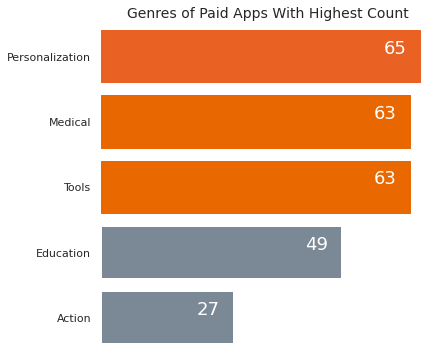

In [173]:
# paid_apps_top_category = paid_apps.groupby('Category').agg({'App': 'count'}).reset_index().sort_values('App',ascending=False).head(5)
sns.set_theme(palette='muted',rc={'figure.figsize': (6,6)},style='whitegrid')
plots = sns.barplot(x=top_genres_df['Count'],y=top_genres_df['Genres'],color='lightslategray')
plots.patches[0].set_color('#E96223')
plots.patches[1].set_color('#E96700')
plots.patches[2].set_color('#E96900')
plt.title('Genres of Paid Apps With Highest Count',size=14)
plt.ylabel('Genres')
plt.xlabel('Count')
plt.grid(False)
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
for spine in plt.gca().spines.values():
  spine.set_visible(False)
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width()-5,
                    bar.get_y()+bar.get_height()/2), ha='center', va='center',color='w',
                   size=18, xytext=(0, 8),
                   textcoords='offset points')



**Findings:** Users would not hesitate to pay for an app if it has some sort of high Educational or Medicinal Value or if it can be used for Personalization of our device and also if it can be use as a tools such as wifi analyzer, scanner etc 

#**Let us see what insights we can have on the basis of Category!!**

###**1) Which are the Top 10 categories that have most number of Apps and how they are rated by the users?**

In [95]:
app_category_df = app_df.groupby('Category').agg({"App": "count","Rating": "median"}).reset_index().sort_values(by='App',ascending=False).head(10)


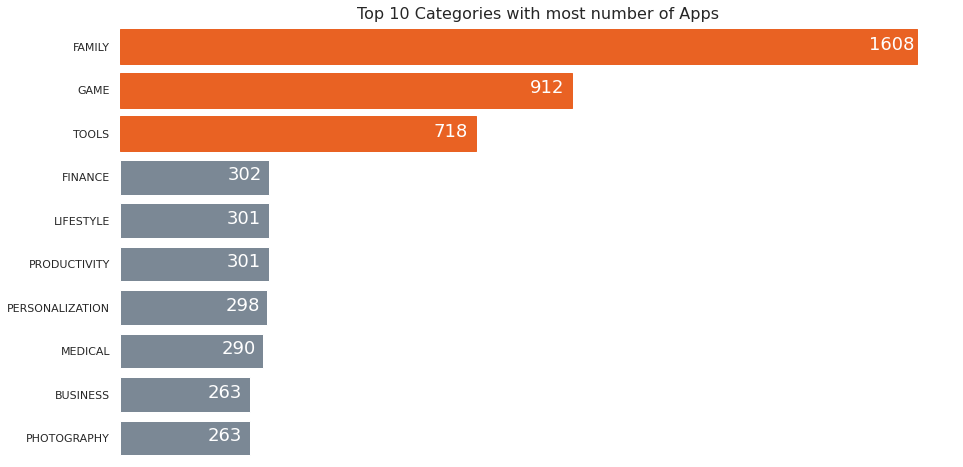

In [189]:

sns.set()
sns.set_theme(style="whitegrid",rc={'figure.figsize':(15,8)},palette='autumn')
plots = sns.barplot(x=app_category_df['App'],y=app_category_df['Category'],color='lightslategray')
plots.patches[0].set_color('#E96223')
plots.patches[1].set_color('#E96223')
plots.patches[2].set_color('#E96223')
plt.grid(False)
plt.ylabel('')
plt.xlabel('')
plt.title('Top 10 Categories with most number of Apps',size=16)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width()-50,
                    bar.get_y()+bar.get_height()/1.5), ha='center', va='center',color='w',
                   size=18, xytext=(0, 8),
                   textcoords='offset points')


**Findings:**Most number of Apps are from categories like Family,Game,Tools,Finance etc and not only these categories have highest number of apps but also they are well rated.

**Number of Apps in each category**

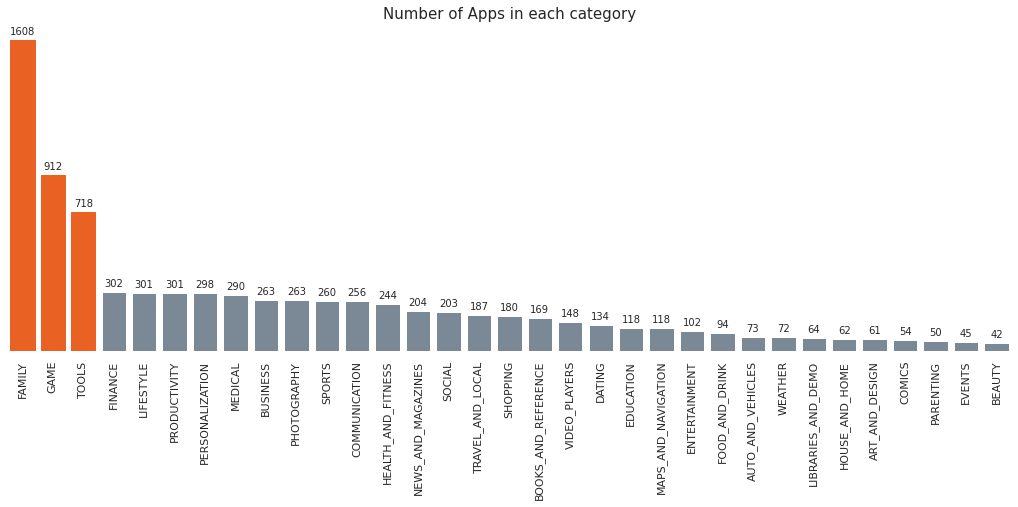

In [188]:
app_category_count_df = app_df.groupby('Category').agg({"App": "count"}).reset_index().sort_values('App',ascending=False)
sns.set_theme(style="whitegrid",rc={'figure.figsize':(18,6)},palette='autumn')
bars = sns.barplot(x=app_category_count_df.Category,y=app_category_count_df.App,color='lightslategray')
bars.patches[0].set_color('#E96223')
bars.patches[1].set_color('#E96223')
bars.patches[2].set_color('#E96223')
plt.xticks(rotation=90)
plt.title('Number of Apps in each category',size=15)
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


###**What are the Bottom 5 categories which have least number of Apps and how they are rated?**

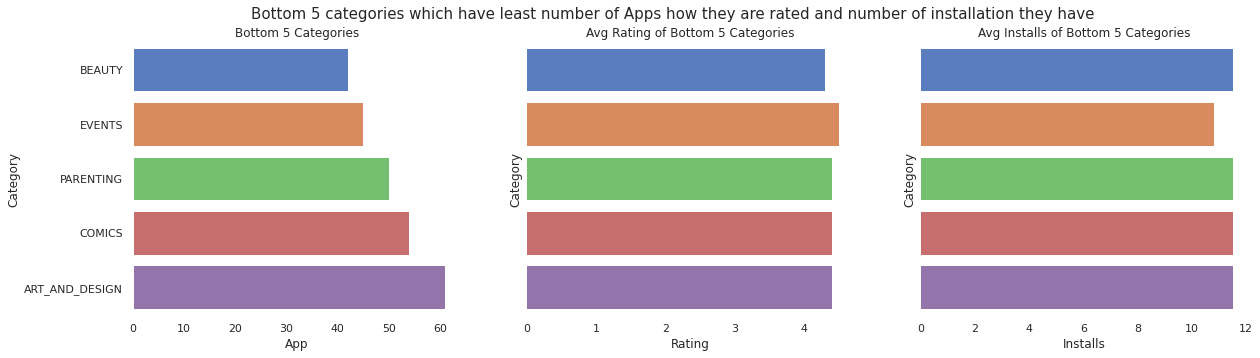

In [158]:
app_bottom_category_df = app_df.groupby('Category').agg({"App": "count","Rating": "median","Installs": np.median}).reset_index().sort_values(by='App',ascending=True).head(5)
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Bottom 5 categories which have least number of Apps how they are rated and number of installation they have',size=15)

sns.set_theme(style='whitegrid',palette='muted')
sns.barplot(ax=axes[0], x=app_bottom_category_df.App, y=app_bottom_category_df.Category)
axes[0].set_title('Bottom 5 Categories')
axes[0].grid(False)


sns.barplot(ax=axes[1], x=app_bottom_category_df.Rating, y=app_bottom_category_df.Category)
axes[1].set_title('Avg Rating of Bottom 5 Categories')
axes[1].grid(False)
installs = np.log(app_bottom_category_df.Installs)
sns.barplot(ax=axes[2], x=installs, y=app_bottom_category_df.Category)
axes[2].set_title('Avg Installs of Bottom 5 Categories')
ax=plt.gca()
for ax in axes:
  for spine in ax.spines.values():
    spine.set_visible(False)
    plt.grid(False)


**Findings:** Although these categories have least number of Apps but still they are quite popular among users with respect to rating and number of Installation.

###**Which are the categories having high number of Installation compared with Number of apps they have?**

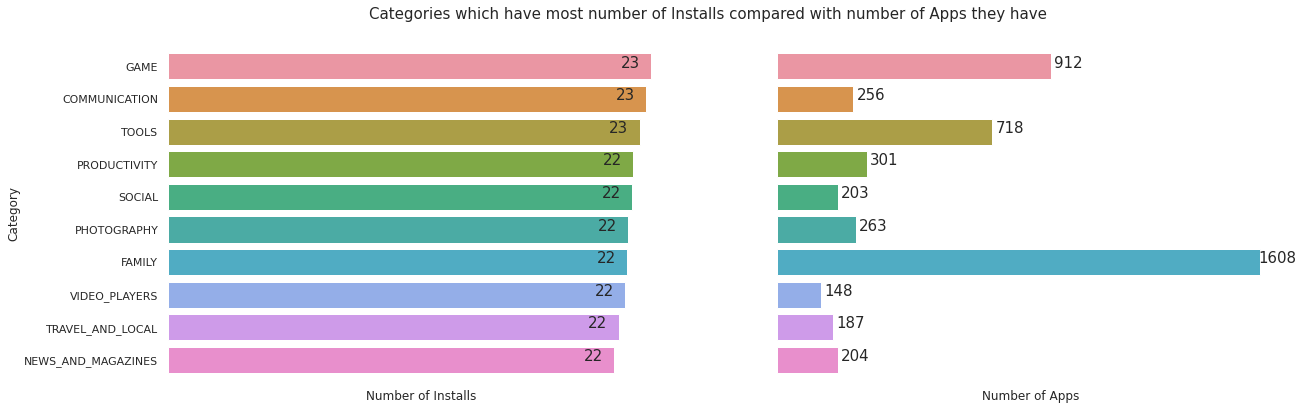

In [187]:
app_categories_installs_df = app_df.groupby('Category').agg({"App": "count","Installs": np.sum,"Rating": np.median}).reset_index().sort_values('Installs',ascending=False).head(10)
sns.set_theme(style="whitegrid",rc={'figure.figsize':(20,6)},palette='autumn')
Installs = np.log(app_categories_installs_df['Installs'])
fig,axes = plt.subplots(1,2,sharey=True)
i_bars = sns.barplot(ax=axes[0],x=Installs,y=app_categories_installs_df['Category'])
for bar in i_bars.patches:
    i_bars.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width()-1,
                    bar.get_y()+bar.get_height()/1.5), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
axes[0].grid(False)
axes[0].set_xlabel('Number of Installs')
a_bars = sns.barplot(ax=axes[1],x=app_categories_installs_df.App,y=app_categories_installs_df['Category'])
for bar in a_bars.patches:
    a_bars.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width()+58,
                    bar.get_y()+bar.get_height()/1.5), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
axes[1].set_xlabel('Number of Apps')
plt.grid(False)
plt.suptitle('Categories which have most number of Installs compared with number of Apps they have',size=15)
plt.ylabel('')
for ax in axes:
  for spine in ax.spines.values():
    spine.set_visible(False)
  ax.axes.xaxis.set_ticklabels([])

**Based on Content Rating which category have most number of apps?**

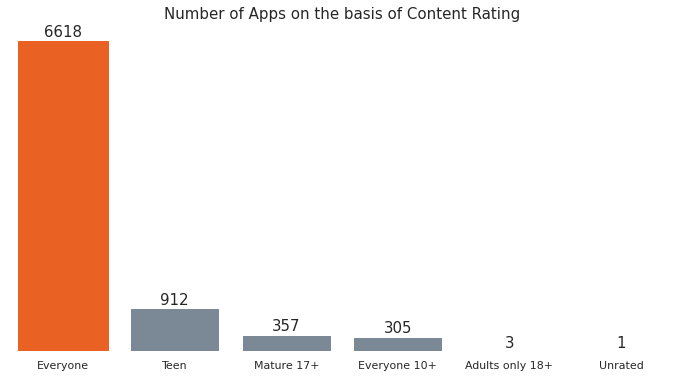

In [168]:
Content_df = app_df.groupby('Content Rating').agg({"App": "count"}).reset_index().sort_values('App',ascending=False)
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,6)},palette='autumn')
bars = sns.barplot(x=Content_df['Content Rating'],y=Content_df.App,color='lightslategrey')
bars.patches[0].set_color('#E96223')
plt.title('Number of Apps on the basis of Content Rating',size=15)
plt.grid(False)
ax=plt.gca()
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')





**Findings:** Content present in most of the apps are for everyone.

**Which Genres have most number of Apps?**

In [141]:
genres_list = []
for index,row in app_df.iterrows():
  for item in row.Genres:
    genres_list.append(item)
unique_genres_list = set(genres_list)
genres_dict = dict()
for item in unique_genres_list:
  genres_dict[item] = genres_list.count(item)
genres_df = pd.Series(genres_dict).reset_index()
genres_df.columns = ['Genres','Count']
genres_df = genres_df.sort_values('Count',ascending=False)

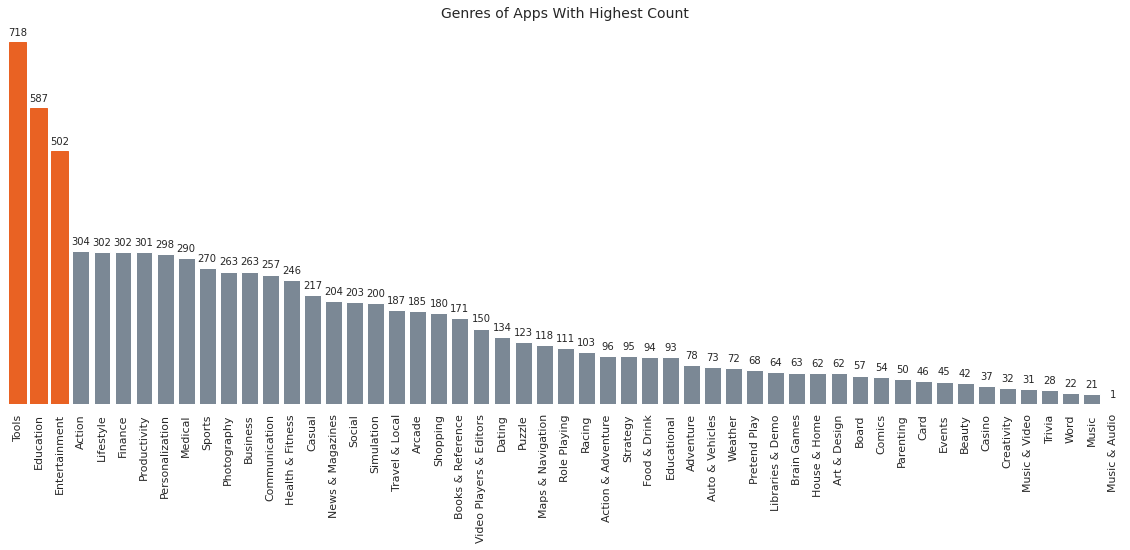

In [182]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,7)},style='whitegrid')
bars = sns.barplot(y=genres_df['Count'],x=genres_df['Genres'],color='lightslategray')
bars.patches[0].set_color('#E96223')
bars.patches[1].set_color('#E96223')
bars.patches[2].set_color('#E96223')
plt.title('Genres of Apps With Highest Count',size=14)
plt.ylabel('Genres')
plt.xlabel('Count')
plt.xticks(rotation=90)
plt.grid(False)
ax=plt.gca()
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

**Findings:** Most of the Apps are developed in the area of Tools,Education,Entertainment,Finance etc.

#**Let us see what insights we can have among the highest rated apps!!**
**1)What is the distribution of the Rating across all the Apps?**

Average Rating of all the apps is 4.3


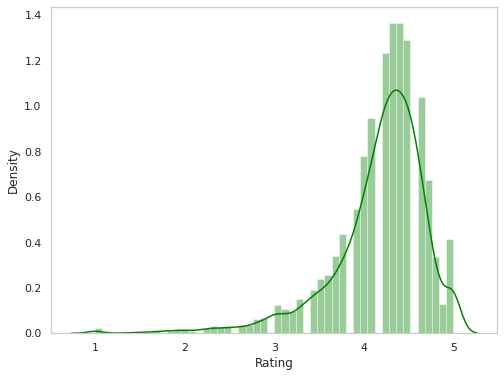

In [108]:
sns.distplot(a=app_df['Rating'],bins=50,color='green')
plt.grid(False)
print('Average Rating of all the apps is {}'.format(app_df['Rating'].median()))

**Findings:**Average Rating of the Apps is 4.3 and most of the Apps are Rated between 3.5 and 4.8

**What is the corelation between Rating and Price?**

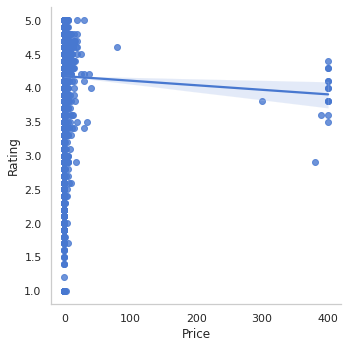

In [163]:
sns.set_theme(style='whitegrid',rc={'figure.figsize': (8,8)},palette='muted')
sns.lmplot(y='Rating',x='Price',data=app_df)
plt.grid(False)

**Findings:**As the Price of the Apps increases the rating decreases even below the Average Rating.

**What is the distribution of Rating across all categories?**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

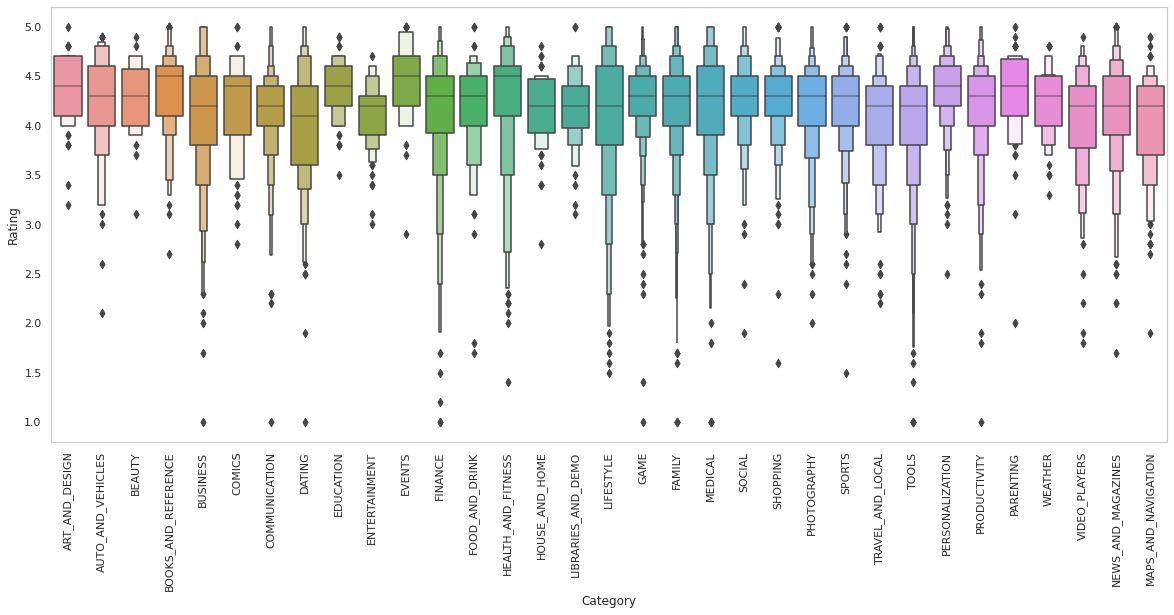

In [146]:
sns.set_theme(style='whitegrid',rc={'figure.figsize':(20,8)},palette='muted')
sns.boxenplot(x=app_df['Category'],y=app_df['Rating'])
plt.grid(False)
plt.xticks(rotation=90)

**Whether there is any corelation exist between Reviews and Rating?**

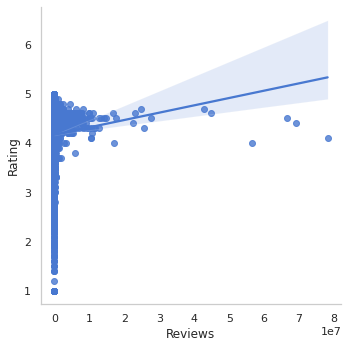

In [151]:
sns.set_theme(style='whitegrid',palette='muted',rc={'figure.figsize': (6,6)})
sns.lmplot(y='Rating',x='Reviews',data=app_df)
plt.grid(False)

**Findings:**From above graph it is clear that there is no corelation exist between Reviews and Ratings as there are ratings irrespective of reviews.

**We well consider highest rated apps as the apps which have rating of more than 4.6**

In [147]:
highest_rated_app_df = app_df[app_df['Rating']>4.6]

**1)Which are the categories having most number of highest rated apps?**

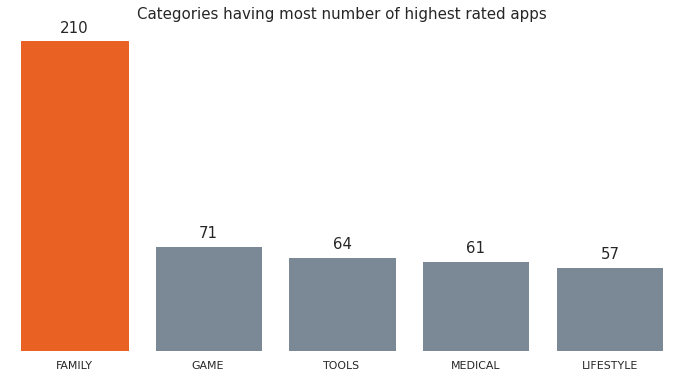

In [183]:
highest_rated_categories = highest_rated_app_df.groupby('Category').agg({"App": "count","Installs": np.sum}).reset_index().sort_values('App',ascending=False).head(5)
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,6)},palette='autumn')
bars = sns.barplot(x=highest_rated_categories['Category'],y=highest_rated_categories.App,color='lightslategray')
bars.patches[0].set_color('#E96223')
plt.title('Categories having most number of highest rated apps',size=15)
plt.xlabel('Category',size=13)
plt.ylabel('Number of Apps',size=13)
plt.grid(False)
ax=plt.gca()
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


**2)Among the highest rated apps which categories have most number of installation?**

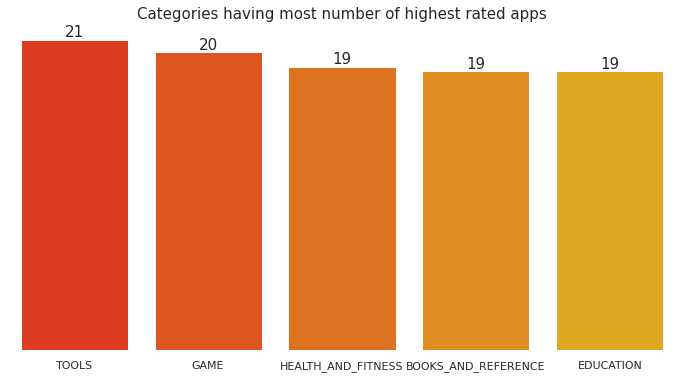

In [150]:
highest_rated_categories = highest_rated_app_df.groupby('Category').agg({"App": "count","Installs": np.sum}).reset_index().sort_values('Installs',ascending=False).head(5)
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,6)},palette='autumn')
Installs = np.log(highest_rated_categories['Installs'])
bars = sns.barplot(x=highest_rated_categories['Category'],y=Installs)
plt.title('Categories having most number of highest rated apps',size=15)
plt.xlabel('Category',size=13)
plt.ylabel('Number of Installs',size=13)
plt.grid(False)
ax=plt.gca()
plt.xlabel('')
plt.ylabel('')
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

**3) What is the Avg size of the top Rated apps?**

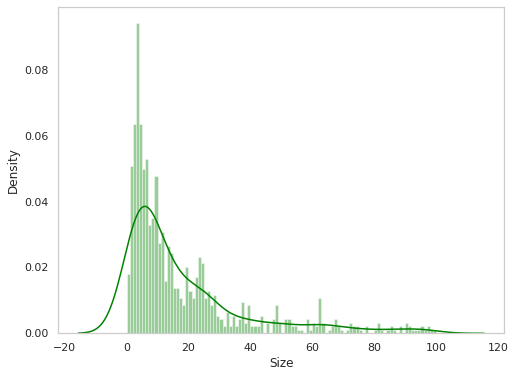

In [112]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(8,6)},palette='pastel')
sns.distplot(a=highest_rated_app_df['Size'],bins=100,color='green')
plt.grid(False)

**Findings:**As most of the high rated apps are generally less than 20Mb therefore we can say that users prefer to have light weighted apps.

#**Sentiment Analysis!!!**
First we will do inner join of both the data set available with us

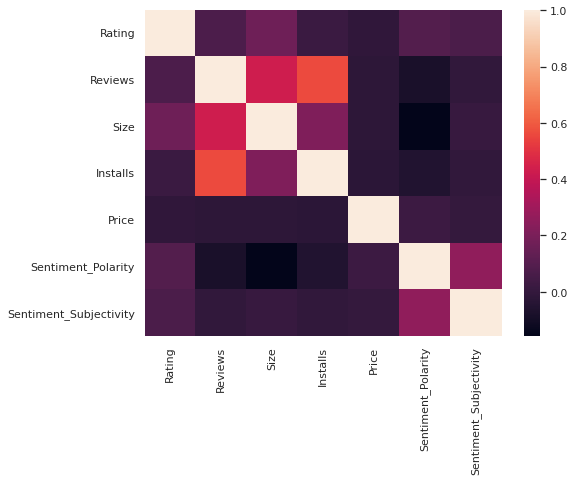

In [152]:
merge_df = pd.merge(left=app_df,right=new_ur_df,how='inner',on='App')
sns.heatmap(merge_df.corr())

In [166]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 35928
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     35929 non-null  object        
 1   Category                35929 non-null  object        
 2   Rating                  35929 non-null  float64       
 3   Reviews                 35929 non-null  int64         
 4   Size                    24069 non-null  float64       
 5   Installs                35929 non-null  int64         
 6   Type                    35929 non-null  object        
 7   Price                   35929 non-null  float64       
 8   Content Rating          35929 non-null  object        
 9   Genres                  35929 non-null  object        
 10  Last Updated            35929 non-null  datetime64[ns]
 11  Current Ver             35929 non-null  object        
 12  Android Ver             35929 non-null  object

**What is distribution of Review Sentiment in the merge dataset?**

In [221]:
sentiment_proportion = merge_df.groupby('Sentiment').agg({"Sentiment_Polarity": "count"}).reset_index()
sentiment_proportion.columns = ['Sentiment','Count']
import plotly.express as px
import plotly.graph_objects as go

fig = px.pie(sentiment_proportion, values='Count', names='Sentiment',title='Distribution of Sentiment',labels={'Sentiment': 'Sentiment'})
fig.update_traces(textposition='inside', textinfo='percent+label',textfont_size=15, marker=dict(colors=colors, line=dict(color='#000000', width=1)))

fig.show(renderer='colab')


**Findings:**Most of Reviews have positive sentiment.


1.   Positive Reviews are 64.2%
2.   Negative Reviews are 22.3%
3.   Neutral Reviews are 13.5%



**What is  the distribution of Sentiment among different categories?**

In [172]:
sentiment_sum = merge_df.groupby('Category').agg({"Sentiment": "count"}).reset_index()
sentiment_count = merge_df.groupby(['Category','Sentiment']).agg({"Sentiment_Polarity":"count"}).reset_index()
new_df = sentiment_sum.merge(sentiment_count,on='Category')
new_df['normalized_sentiment'] = new_df['Sentiment_Polarity']/new_df['Sentiment_x']
new_df.head()

,Category,Sentiment_x,Sentiment_y,Sentiment_Polarity,normalized_sentiment
0,ART_AND_DESIGN,382,Negative,61,0.159686
1,ART_AND_DESIGN,382,Neutral,62,0.162304
2,ART_AND_DESIGN,382,Positive,259,0.678010
3,AUTO_AND_VEHICLES,289,Negative,17,0.058824
4,AUTO_AND_VEHICLES,289,Neutral,36,0.124567


In [191]:
new_df_stack = new_df.pivot(index='Category',columns='Sentiment_y',values='normalized_sentiment')

Text(0.5, 1.0, 'Fraction of Sentiment Polarity by Category')

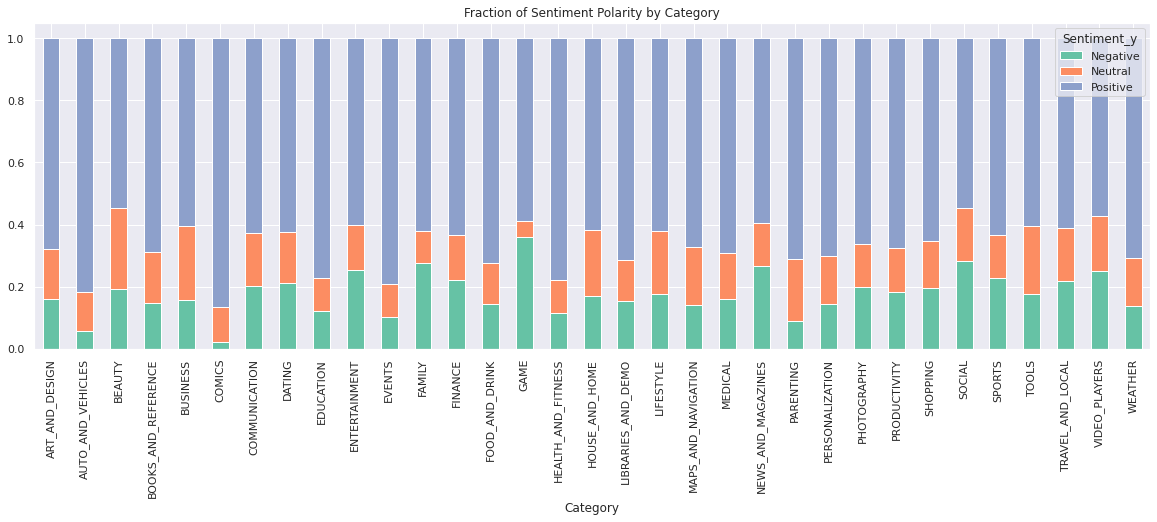

In [193]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
sns.set(palette="Set2")
new_df_stack.plot(kind='bar', stacked = True)
plt.title("Fraction of Sentiment Polarity by Category")
# plt.savefig("sentiment_dist.svg", format='svg', dpi=1200)


**Findings:**We see that the Apps belonging to the category of Education, Events,Health and Fitness,Auto and Vehicles have higher percentage of positive reviews showing that user find these types of apps very useful. Whereas the Apps belonging to the category of Game and Family have higher percentage of negative reviews telling us that there need more improvement in these Category of Apps

**2) What is the distribution of Sentiment among the Paid and the Free Apps?**

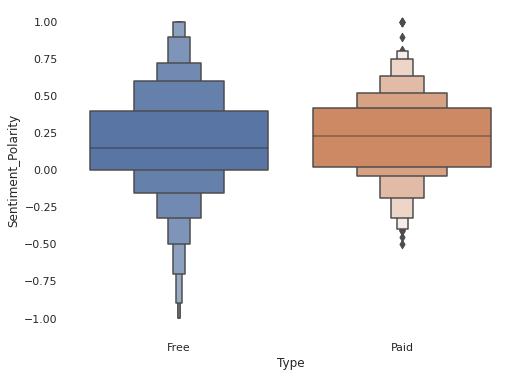

In [153]:
# paid_df = merge_df[merge_df['Type']=='Paid']
# free_df = merge_df[merge_df['Type']=='Free']
sns.set_theme(rc={'figure.figsize': (8,6)},style='whitegrid')
sns.boxenplot(x=merge_df['Type'],y=merge_df['Sentiment_Polarity'])
plt.grid(False)
ax = plt.gca()
for spine in ax.spines.values():
  spine.set_visible(False)


**Findings:**We compared the reviews between free and paid apps and found that people are harsher towards free apps whereas users are more tolerant when they are paying for it.

#**Let us see what insight we can have from last update column!!**

In [154]:
last_update_df = app_df.copy()
last_update_df['updateyear'] = pd.DatetimeIndex(last_update_df['Last Updated']).year

**What trend we can see for the apps being getting updated?**

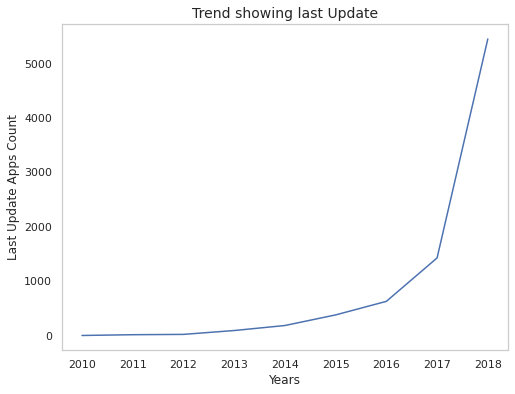

In [230]:
update_years = last_update_df.groupby('updateyear').agg({"App": "count"}).reset_index()
sns.lineplot(data=update_years, x="updateyear", y="App")
plt.title('Trend showing last Update',size=14)
plt.ylabel('Last Update Apps Count',size=12)
plt.xlabel('Years',size=12)
plt.grid(False)

**Findings**After 2017 apps were getting frequently updated.This shows that app development business mainly flourished after 2017 as after this year we see huge updates and obviously development of more apps.Also we can say that after 2017 there have been more feature addition in each app.So we can say 2017 is the landmark year for the app development business.

**Whether the recently updated apps are more liked by the users?**

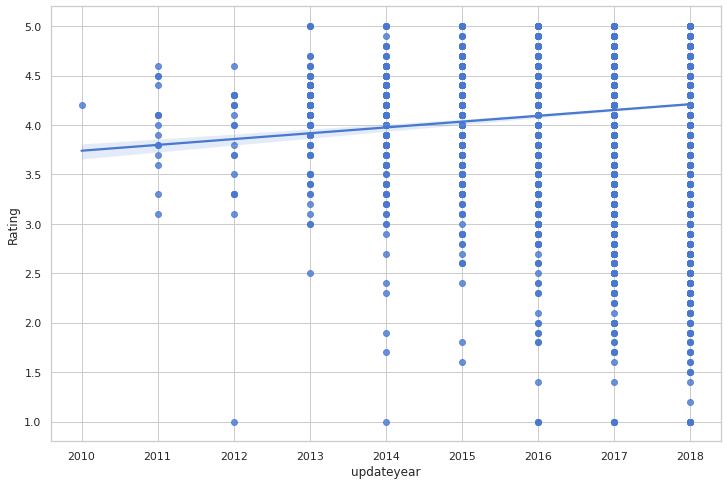

In [234]:
sns.set_theme(style="whitegrid",palette='muted',rc={'figure.figsize': (12,8)})
sns.regplot(data=last_update_df,x='updateyear',y='Rating')


**Findings:**Apps getting updated frequently have more chances of being rated well.